### Linear Regression - using RFE

- RFE stands for Recursive Feature Elimination
- This is a way to reduce the number of features in the model by eliminating less significant ones first automatically
- You have to specify the number of features you want in the model and the method tells you which n variables are most significant for your analysis

We will be using RFE in this notebook to get rid of the less significant variables and only keep as much variables as we want.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv('Housing.csv')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# dummy variables creation

binary_vars = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

housing[binary_vars] = housing[binary_vars].apply(lambda x : x.map({"yes" : 1, "no" : 0}))

In [6]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [11]:
# getting dummies for furnishingstatus column

temp_df = pd.get_dummies(data=housing.furnishingstatus, drop_first=True)

# concatenating with housing df

housing = pd.concat((housing, temp_df), axis=1)

# removing the original column

housing.drop(columns="furnishingstatus", inplace=True)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [17]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(housing, train_size=0.7, random_state=100)

print(train_df.shape)
print(test_df.shape)

(381, 14)
(164, 14)


In [21]:
# standardisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_vars = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]

train_df[num_vars] = scaler.fit_transform(train_df[num_vars])

train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,-0.575831,-0.736734,0.092755,-0.575844,-0.911674,1,0,0,0,0,0.318635,0,0,1
19,2.254239,0.632894,0.092755,1.533738,0.219752,1,0,0,0,1,0.318635,1,1,0
159,0.386778,-0.955291,0.092755,1.533738,-0.911674,1,1,1,0,1,-0.848672,0,0,0
35,1.828458,0.914591,0.092755,1.533738,2.482604,1,0,0,0,1,1.485941,0,0,0
28,2.003961,1.375990,2.811204,1.533738,0.219752,1,0,1,1,0,1.485941,0,0,1


In [22]:
test_df[num_vars] = scaler.transform(test_df[num_vars])

test_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,-0.194638,-1.086426,0.092755,-0.575844,0.219752,1,0,0,0,0,-0.848672,1,1,0
54,1.426396,0.428907,0.092755,1.533738,0.219752,1,1,0,0,1,0.318635,0,1,0
171,0.271265,2.502291,0.092755,-0.575844,-0.911674,1,0,0,0,0,0.318635,1,1,0
244,-0.113779,0.098642,0.092755,-0.575844,0.219752,1,1,1,0,0,-0.848672,1,1,0
268,-0.206190,-0.081061,1.451980,-0.575844,0.219752,1,0,0,0,1,-0.848672,0,1,0


In [35]:
# separating samples and targets from the dataset

y_train = train_df.iloc[:, 0]

x_train = train_df.iloc[:, 1:]

y_test = test_df.iloc[:, 0]

x_test = test_df.iloc[:, 1:]

In [37]:
# model building

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [45]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

rfe = RFE(lr, 10)

rfe = rfe.fit(x_train, y_train)

In [49]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 3),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', True, 1)]

In [54]:
pref_cols = x_train.columns[rfe.support_]

x_train.columns[~rfe.support_]

Index(['bedrooms', 'parking', 'semi-furnished'], dtype='object')

In [63]:
# building the model again using statsmodels

import statsmodels.api as sm

x_train_rfe = x_train[pref_cols]

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     74.94
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.19e-82
Time:                        21:34:34   Log-Likelihood:                -329.72
No. Observations:                 381   AIC:                             681.4
Df Residuals:                     370   BIC:                             724.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5612      0.094     -5.963      0.000      -0.746      -0.376
area                0.3048      0.033      9.106      0.000       0.239       0.371
bathrooms           0.3047      0.033      9.294      0.000       0.240       0.369
stories             0.2106      0.034      6.286      0.000       0.145       0.276
mainroad            0.3470      0.091      3.800      0.000       0.167       0.527
guestroom           0.1632      0.087      1.867      0.063      -0.009       0.335
basement            0.1518      0.071      2.149      0.032       0.013       0.291
hotwaterheating     0.5862      0.138      4.235      0.000       0.314       0.858
airconditioning     0.4576      0.072      6.349      0.000       0.316       0.599
prefarea            0.3730      0.076      4.909      0.000       0.224       0.522
unfurnished        -0.2206      0.066     -3.362      0.001      -0.350      -0.092
==============================================================================
Omnibus:                      109.105   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.517
Skew:                           1.251   Prob(JB):                     8.66e-84
Kurtosis:                       7.224   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# calculating vif of every column in the final model to see check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [67]:
get_vif(x_train[pref_cols])

,Features,VIF
3,mainroad,2.45
5,basement,1.92
7,airconditioning,1.60
8,prefarea,1.50
4,guestroom,1.46
9,unfurnished,1.39
2,stories,1.24
1,bathrooms,1.20
0,area,1.14
6,hotwaterheating,1.10


The vif is good for every variable meaning there is little or no collinearity in the model

We can drop more variables according to p-value and VIF if that's needed but in this case, we don't need to

In [69]:
# residual analysis

y_train_pred = lm.predict(x_train_rfe)

res = y_train - y_train_pred

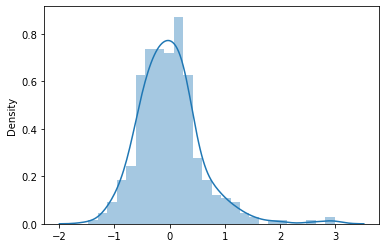

In [72]:
sns.distplot(res)
plt.show()

In [74]:
# evaluation

x_test_rfe = x_test[pref_cols]

x_test_rfe = sm.add_constant(x_test_rfe)

y_test_pred = lm.predict(x_test_rfe)

In [76]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.6514935865655234

Train r2 - 66 %<br>
Test r2 - 65 %